# 支持向量机
优点：泛化错误率低，计算开销不大，结果易解释

缺点：对参数调节和核函数选择敏感，原始分类器不加修改仅适用于处理二类问题。

适用数据类型：数值型和标称型数据
$$\min\limits{\theta}C\sum\limits{i=1}^{m}\left[y^{(i)}{\cos}t{1}\left(\theta^{T}x^{(i)}\right)+\left(1-y^{(i)}\right){\cos}t\left(\theta^{T}x^{(i)}\right)\right]+\frac{1}{2}\sum\limits{i=1}^{n}\theta^{2}_{j}$$


> 拉格朗日乘子法

类别标签用`-1`、`1`，是为了后期方便 \\(label*(w^Tx+b)\\) 的标识和距离计算；

如果 \\(label*(w^Tx+b)>0\\) 表示预测正确，否则预测错误。

现在目标很明确，就是要找到w和b，因此我们必须要找到最小间隔的数据点，也就是前面所说的支持向量。也就说，让最小的距离取最大.
(最小的距离：就是最小间隔的数据点；最大：就是最大间距，为了找出最优超平面--最终就是支持向量)

目标函数：\\(arg: max_{关于w, b} \left( min[label*(w^Tx+b)]*\frac{1}{||w||} \right) \\)

如果 \\(label*(w^Tx+b)>0\\) 表示预测正确，也称函数间隔，\\(||w||\\) 可以理解为归一化，也称几何间隔。

令 \\(label*(w^Tx+b)>=1\\)， 因为0～1之间，得到的点是存在误判的可能性，所以要保障 \\(min[label*(w^Tx+b)]=1\\)，才能更好降低噪音数据影响。

所以本质上是求 \\(arg: max_{关于w, b} \frac{1}{||w||} \\)；也就说，我们约束(前提)条件是: \\(label*(w^Tx+b)=1\\)

新的目标函数求解： \\(arg: max_{关于w, b} \frac{1}{||w||} \\)

=> 就是求: \\(arg: min_{关于w, b} ||w|| \\) (求矩阵会比较麻烦，如果x只是 \\(\frac{1}{2}*x^2\\) 的偏导数，那么。。同样是求最小值)

=> 就是求: \\(arg: min_{关于w, b} (\frac{1}{2}*||w||^2)\\) (二次函数求导，求极值，平方也方便计算)

本质上就是求线性不等式的二次优化问题(求分隔超平面，等价于求解相应的凸二次规划问题)

通过拉格朗日乘子法，求二次优化问题

假设需要求极值的目标函数 (objective function) 为 f(x,y)，限制条件为 φ(x,y)=M # M=1

设g(x,y)=M-φ(x,y) # 临时φ(x,y)表示下文中 \\(label*(w^Tx+b)\\)

定义一个新函数: F(x,y,λ)=f(x,y)+λg(x,y)

a为λ（a>=0），代表要引入的拉格朗日乘子(Lagrange multiplier)

那么： \\(L(w,b,\alpha)=\frac{1}{2} * ||w||^2 + \sum_{i=1}^{n} \alpha_i * [1 - label * (w^Tx+b)]\\)

因为：\\(label*(w^Tx+b)>=1, \alpha>=0\\) , 所以 \\(\alpha*[1-label*(w^Tx+b)]<=0\\) , \\(\sum_{i=1}^{n} \alpha_i * [1-label*(w^Tx+b)]<=0\\)

当 \\(label*(w^Tx+b)>1\\) 则 \\(\alpha=0\\) ，表示该点为非支持向量

相当于求解： \\(max_{关于\alpha} L(w,b,\alpha) = \frac{1}{2} *||w||^2\\)

如果求： \\(min_{关于w, b} \frac{1}{2} *||w||^2\\) , 也就是要求： \\(min_{关于w, b} \left( max_{关于\alpha} L(w,b,\alpha)\right)\\)

现在转化到对偶问题的求解

\\(min_{关于w, b} \left(max_{关于\alpha} L(w,b,\alpha) \right) \\) >= \\(max_{关于\alpha} \left(min_{关于w, b}\ L(w,b,\alpha) \right) \\)

现在分2步

先求： \\(min_{关于w, b} L(w,b,\alpha)=\frac{1}{2} * ||w||^2 + \sum_{i=1}^{n} \alpha_i * [1 - label * (w^Tx+b)]\\)

就是求L(w,b,a)关于[w, b]的偏导数, 得到w和b的值，并化简为：L和a的方程。

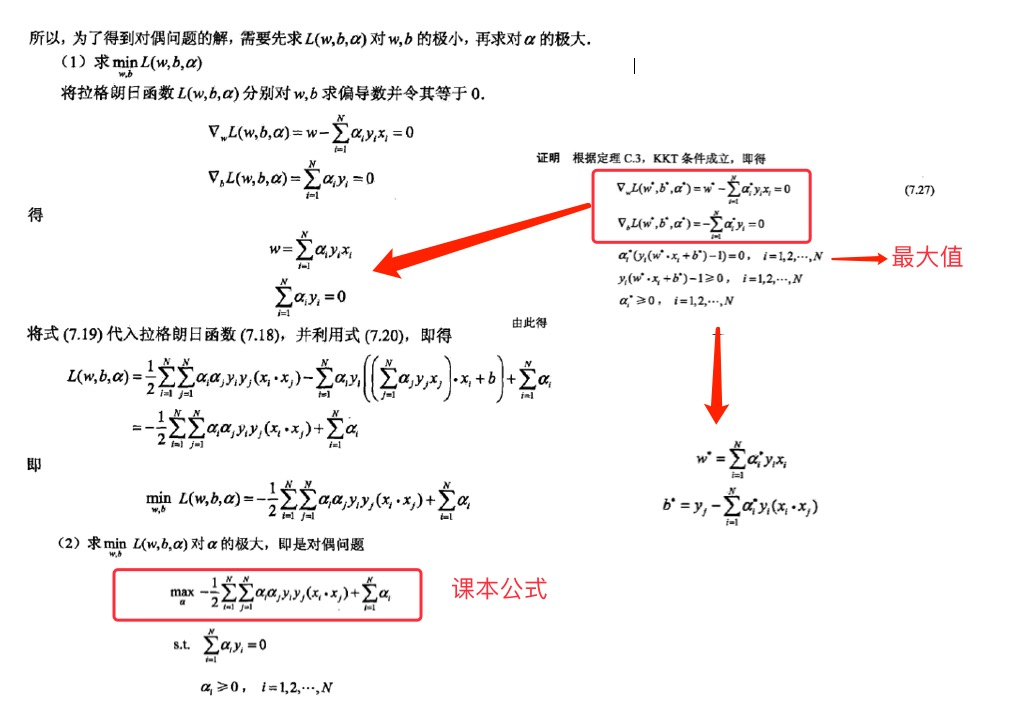

In [ ]:
from numpy import *
class optStruct:
    """
    建立数据结构来保存重要值
    """
    def __init__(self,dataMatIn,classLabels,C,toler,kTup):
        """
        Args:
            dataMatIn    数据集
            classLabels  类别标签
            C            松弛变量（常量值），允许有些数据点可以处于分隔面错误的一侧。
            控制最大化建个和保证大部分函数间间隔小于1.0这两个目标的权重。
            toler        容错率
            kTup         包含核函数的元组
            """
        self.X = dataMatin
        self.labelMat = classLabels
        self.C = C
        self.tol = self.toler
        
        #数据的行数
        self.m = shape(dateMatIn)[0]
        self.alphas = mat(zeros((self.m,1)))
        self.b = 0
        
        #误差缓存，第一列给出的是eCache是否有效的标志位，第二列给出的是实际的E值。
        self.eCache = mat(zeros((self.m,2)))
        
        #m行m列的矩阵
        self.K = mat(zeros((self.m,self.m)))
        for i in range(self.m):
            self.K[:,1] = kernelTrans(self.X,self.X[i],kTup)


In [1]:
def kernelTrans(X,A,kTup):
    """
    核函数：将低维数据映射向高维空间
    Args:
        X    dataMatIn数据集
        A    dataMatIn数据集的第i行的数据
        kTup 核函数的信息
    """
    m,n = shape(X)
    K = mat(zeros((m,1)))
    if kTup[0] == 'lin':
        K = X * A.T
    elif kTup[0] == 'rbf':
        for j in range(m):
            deltaRow = X[j,:] - A
            K[j] = deltaRow * deltaRow.T
            #径向基函数的高斯版本
        K = exp(K/(-1 * kTup[1] ** 2))
    else:
        raise NameError('Houston We Have a Problem -- That Kernel is not recognized')
    return K

In [ ]:
def loadDataSet(fileName):
    """
    逐行解析fileName文件
    Args:
        fileName  文件名
    """
    dataMat = [] #特征矩阵
    labelMat = [] #类标签
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]),float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

In [ ]:
def calcEk(oS,k):
    """
    calcEk(求Ek误差：预测值-真实值)
    Aargs:
        oS    optStruct对象
        k     具体某行
        Ek    预测结果与真实结果比对。
    """
    fXk = multiply(oS.alphas,oS.labelMat).T * oS.K[:,k] + oS.b
    Ek = fXk - float(oS.labelMat[k])
    return Ek


In [ ]:
def selectJrand(i,m):
    """
    随机选择一个整数
    Args:
       i   第一个alpha的下标
       m   所有alpha的数目
       j   返回一个不为i的随机数，在0~m之间的整数
    """
    while i:
        j = random.randint(0,m - 1)
    return j
    

In [ ]:
def selectJ(i,oS,Ei):
    """
    selectJ(返回最优的j和Ej)
    内循环的启发式方法。
    选择第二个(内循环)alpha的alpha值
    这里的目标是选择合适的第二个alpha值以保证每次优化中采用最大步长。
    该函数的误差与第一个alpha值Ei和下标i有关。
    Args:
        i   具体的第i一行
        oS  optStruct对象
        Ei  预测结果与真实结果比对，计算误差Ei
    Returns:
        j  随机选出的第j一行
        Ej 预测结果与真实结果比对，计算误差Ej
    """
    maxK = -1
    maxDeltaE = 0
    Ej = 0
    # 首先将输入值Ei在缓存中设置成为有效的。这里的有效意味着它已经计算好了。
    oS.eCache[i] = [1, Ei]
    # 非零E值的行的list列表，所对应的alpha值
    validEcacheList = nonzero(oS.eCache[:, 0].A)[0]
    if (len(validEcacheList)) > 1:
        for k in validEcacheList:  # 在所有的值上进行循环，并选择其中使得改变最大的那个值
            if k == i:
                continue  # don't calc for i, waste of time

            # 求 Ek误差：预测值-真实值的差
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if deltaE > maxDeltaE:
                # 选择具有最大步长的j
                maxK = k
                maxDeltaE = deltaE
                Ej = Ek
        return maxK, Ej
    else:  # 如果是第一次循环，则随机选择一个alpha值
        j = selectJrand(i, oS.m)

        # 求 Ek误差：预测值-真实值的差
        Ej = calcEk(oS, j)
    return j, Ej



In [ ]:
def updateEk(oS, k):
    """updateEk（计算误差值并存入缓存中。）
    在对alpha值进行优化之后会用到这个值。
    Args:
        oS  optStruct对象
        k   某一列的行号
    """

    # 求 误差：预测值-真实值的差
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1, Ek]


In [ ]:
def clipAlpha(aj, H, L):
    """clipAlpha(调整aj的值，使aj处于 L<=aj<=H)
    Args:
        aj  目标值
        H   最大值
        L   最小值
    Returns:
        aj  目标值
    """
    aj = min(aj, H)
    aj = max(L, aj)
    return aj

In [ ]:
def innerL(i, oS):
    """innerL
    内循环代码
    Args:
        i   具体的某一行
        oS  optStruct对象
    Returns:
        0   找不到最优的值
        1   找到了最优的值，并且oS.Cache到缓存中
    """

    # 求 Ek误差：预测值-真实值的差
    Ei = calcEk(oS, i)

    # 约束条件 (KKT条件是解决最优化问题的时用到的一种方法。我们这里提到的最优化问题通常是指对于给定的某一函数，求其在指定作用域上的全局最小值)
    # 0<=alphas[i]<=C，但由于0和C是边界值，我们无法进行优化，因为需要增加一个alphas和降低一个alphas。
    # 表示发生错误的概率：labelMat[i]*Ei 如果超出了 toler， 才需要优化。至于正负号，我们考虑绝对值就对了。
    '''
    # 检验训练样本(xi, yi)是否满足KKT条件
    yi*f(i) >= 1 and alpha = 0 (outside the boundary)
    yi*f(i) == 1 and 0<alpha< C (on the boundary)
    yi*f(i) <= 1 and alpha = C (between the boundary)
    '''
    if ((oS.labelMat[i] * Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i] * Ei > oS.tol) and (oS.alphas[i] > 0)):
        # 选择最大的误差对应的j进行优化。效果更明显
        j, Ej = selectJ(i, oS, Ei)
        alphaIold = oS.alphas[i].copy()
        alphaJold = oS.alphas[j].copy()

        # L和H用于将alphas[j]调整到0-C之间。如果L==H，就不做任何改变，直接return 0
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L == H:
            # print("L==H")
            return 0

        # eta是alphas[j]的最优修改量，如果eta==0，需要退出for循环的当前迭代过程
        # 参考《统计学习方法》李航-P125~P128<序列最小最优化算法>
        eta = 2.0 * oS.K[i, j] - oS.K[i, i] - oS.K[j, j]  # changed for kernel
        if eta >= 0:
            print("eta>=0")
            return 0

        # 计算出一个新的alphas[j]值
        oS.alphas[j] -= oS.labelMat[j] * (Ei - Ej) / eta
        # 并使用辅助函数，以及L和H对其进行调整
        oS.alphas[j] = clipAlpha(oS.alphas[j], H, L)
        # 更新误差缓存
        updateEk(oS, j)

        # 检查alpha[j]是否只是轻微的改变，如果是的话，就退出for循环。
        if abs(oS.alphas[j] - alphaJold) < 0.00001:
            # print("j not moving enough")
            return 0

        # 然后alphas[i]和alphas[j]同样进行改变，虽然改变的大小一样，但是改变的方向正好相反
        oS.alphas[i] += oS.labelMat[j] * oS.labelMat[i] * (alphaJold - oS.alphas[j])
        # 更新误差缓存
        updateEk(oS, i)

        # 在对alpha[i], alpha[j] 进行优化之后，给这两个alpha值设置一个常数b。
        # w= Σ[1~n] ai*yi*xi => b = yi- Σ[1~n] ai*yi(xi*xj)
        # 所以：  b1 - b = (y1-y) - Σ[1~n] yi*(a1-a)*(xi*x1)
        # 为什么减2遍？ 因为是 减去Σ[1~n]，正好2个变量i和j，所以减2遍
        b1 = oS.b - Ei - oS.labelMat[i] * (oS.alphas[i] - alphaIold) * oS.K[i, i] - oS.labelMat[j] * (oS.alphas[j] - alphaJold) * oS.K[i, j]
        b2 = oS.b - Ej - oS.labelMat[i] * (oS.alphas[i] - alphaIold) * oS.K[i, j] - oS.labelMat[j] * (oS.alphas[j] - alphaJold) * oS.K[j, j]
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]):
            oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]):
            oS.b = b2
        else:
            oS.b = (b1 + b2) / 2
        return 1
    else:
        return 0


In [ ]:
def smoP(dataMatIn, classLabels, C, toler, maxIter, kTup=('lin', 0)):
    """
    完整SMO算法外循环，与smoSimple有些类似，但这里的循环退出条件更多一些
    Args:
        dataMatIn    数据集
        classLabels  类别标签
        C   松弛变量(常量值)，允许有些数据点可以处于分隔面的错误一侧。
            控制最大化间隔和保证大部分的函数间隔小于1.0这两个目标的权重。
            可以通过调节该参数达到不同的结果。
        toler   容错率
        maxIter 退出前最大的循环次数
        kTup    包含核函数信息的元组
    Returns:
        b       模型的常量值
        alphas  拉格朗日乘子
    """

    # 创建一个 optStruct 对象
    oS = optStruct(mat(dataMatIn), mat(classLabels).transpose(), C, toler, kTup)
    iter = 0
    entireSet = True
    alphaPairsChanged = 0

    # 循环遍历：循环maxIter次 并且 （alphaPairsChanged存在可以改变 or 所有行遍历一遍）
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):
        alphaPairsChanged = 0
        # ----------- 第一种写法 start -------------------------
        #  当entireSet=true or 非边界alpha对没有了；就开始寻找 alpha对，然后决定是否要进行else。
        if entireSet:
            # 在数据集上遍历所有可能的alpha
            for i in range(oS.m):
                # 是否存在alpha对，存在就+1
                alphaPairsChanged += innerL(i, oS)
                # print("fullSet, iter: %d i:%d, pairs changed %d" % (iter, i, alphaPairsChanged))
            iter += 1

        # 对已存在 alpha对，选出非边界的alpha值，进行优化。
        else:
            # 遍历所有的非边界alpha值，也就是不在边界0或C上的值。
            nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i, oS)
                # print("non-bound, iter: %d i:%d, pairs changed %d" % (iter, i, alphaPairsChanged))
            iter += 1
        # ----------- 第一种写法 end -------------------------

        # ----------- 第二种方法 start -------------------------
        # if entireSet:																				#遍历整个数据集
    	# 	alphaPairsChanged += sum(innerL(i, oS) for i in range(oS.m))
		# else: 																						#遍历非边界值
		# 	nonBoundIs = nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]						#遍历不在边界0和C的alpha
		# 	alphaPairsChanged += sum(innerL(i, oS) for i in nonBoundIs)
		# iter += 1
        # ----------- 第二种方法 end -------------------------
        # 如果找到alpha对，就优化非边界alpha值，否则，就重新进行寻找，如果寻找一遍 遍历所有的行还是没找到，就退出循环。
        if entireSet:
            entireSet = False  # toggle entire set loop
        elif alphaPairsChanged == 0:
            entireSet = True
        print("iteration number: %d" % iter)
    return oS.b, oS.alphas

In [ ]:
def calcWs(alphas, dataArr, classLabels):
    """
    基于alpha计算w值
    Args:
        alphas        拉格朗日乘子
        dataArr       feature数据集
        classLabels   目标变量数据集
    Returns:
        wc  回归系数
    """
    X = mat(dataArr)
    labelMat = mat(classLabels).T
    m, n = shape(X)
    w = zeros((n, 1))
    for i in range(m):
        w += multiply(alphas[i] * labelMat[i], X[i].T)
    return w

In [ ]:
def testRbf(k1=1.3):
    dataArr, labelArr = loadDataSet('db/6.SVM/testSetRBF.txt')
    b, alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, ('rbf', k1))  # C=200 important
    datMat = mat(dataArr)
    labelMat = mat(labelArr).transpose()
    svInd = nonzero(alphas.A > 0)[0]
    sVs = datMat[svInd]  # get matrix of only support vectors
    labelSV = labelMat[svInd]
    print("there are %d Support Vectors" % shape(sVs)[0])
    m, n = shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs, datMat[i, :], ('rbf', k1))

        # 和这个svm-simple类似： fXi = float(multiply(alphas, labelMat).T*(dataMatrix*dataMatrix[i, :].T)) + b
        predict = kernelEval.T * multiply(labelSV, alphas[svInd]) + b
        if sign(predict) != sign(labelArr[i]):
            errorCount += 1
    print("the training error rate is: %f" % (float(errorCount) / m))

    dataArr, labelArr = loadDataSet('db/6.SVM/testSetRBF2.txt')
    errorCount = 0
    datMat = mat(dataArr)
    labelMat = mat(labelArr).transpose()
    m, n = shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs, datMat[i, :], ('rbf', k1))
        predict = kernelEval.T * multiply(labelSV, alphas[svInd]) + b
        if sign(predict) != sign(labelArr[i]):
            errorCount += 1
    print("the test error rate is: %f" % (float(errorCount) / m))

In [ ]:
def smoSimplt(dataMatIn,classLabels,C,toler,maxIter):
    """
    Args:
        dataMatIn 特征集合
        classLabels 类别标签
        C 松弛变量(常量值)
        toler 容错率
        maxIter 最大循环次数
    returns:
        b 模型常量
        alphas 拉格朗日乘子
    """
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    #初始化
    b = 0 
    alphas = mat(zeros((m,1)))
    # 没有alpha改变的情况下遍历数据的次数
    iter = 0
    while(iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            # 我们预测的类别 y[i] = w^Tx[i] + b，其中w = Σ(1~n) a[n]*lable[n]*x[n]
            fXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            #预测结果与真实结果对比，计算误差Ei
            Ei = fxi - float(labelMat[i])
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                # 如果满足优化的条件，我们就随机选取非i的一个点，进行优化比较
                j = selectJrand(i, m)
                # 预测j的结果
                fXj = float(multiply(alphas, labelMat).T*(dataMatrix*dataMatrix[j, :].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy()
                alphaJold = alphas[j].copy()

                # L和H用于将alphas[j]调整到0-C之间。如果L==H，就不做任何改变，直接执行continue语句
                # labelMat[i] != labelMat[j] 表示异侧，就相减，否则是同侧，就相加。
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                # 如果相同，就没发优化了
                if L == H:
                    print("L==H")
                    continue

                # eta是alphas[j]的最优修改量，如果eta==0，需要退出for循环的当前迭代过程
                # 参考《统计学习方法》李航-P125~P128<序列最小最优化算法>
                eta = 2.0 * dataMatrix[i, :]*dataMatrix[j, :].T - dataMatrix[i, :]*dataMatrix[i, :].T - dataMatrix[j, :]*dataMatrix[j, :].T
                if eta >= 0:
                    print("eta>=0")
                    continue

                # 计算出一个新的alphas[j]值
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                # 并使用辅助函数，以及L和H对其进行调整
                alphas[j] = clipAlpha(alphas[j], H, L)
                # 检查alpha[j]是否只是轻微的改变，如果是的话，就退出for循环。
                if (abs(alphas[j] - alphaJold) < 0.00001):
                    print("j not moving enough")
                    continue
                # 然后alphas[i]和alphas[j]同样进行改变，虽然改变的大小一样，但是改变的方向正好相反
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                # 在对alpha[i], alpha[j] 进行优化之后，给这两个alpha值设置一个常数b。
                # w= Σ[1~n] ai*yi*xi => b = yj- Σ[1~n] ai*yi(xi*xj)
                # 所以：  b1 - b = (y1-y) - Σ[1~n] yi*(a1-a)*(xi*x1)
                # 为什么减2遍？ 因为是 减去Σ[1~n]，正好2个变量i和j，所以减2遍
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i, :]*dataMatrix[i, :].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i, :]*dataMatrix[j, :].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i, :]*dataMatrix[j, :].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j, :]*dataMatrix[j, :].T
                if (0 < alphas[i]) and (C > alphas[i]):
                    b = b1
                elif (0 < alphas[j]) and (C > alphas[j]):
                    b = b2
                else:
                    b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print("iter: %d i:%d, pairs changed %d" % (iter, i, alphaPairsChanged))
        # 在for循环外，检查alpha值是否做了更新，如果在更新则将iter设为0后继续运行程序
        # 知道更新完毕后，iter次循环无变化，才推出循环。
        if (alphaPairsChanged == 0):
            iter += 1
        else:
            iter = 0
        print("iteration number: %d" % iter)
    return b, alphas



In [3]:
#将32*32的文本转化为1 * 1024的矩阵
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):#每行读取
        lineStr = fr.readline()
        for j in range(32):#每列读取
            returnVect[0,32 * i + j] = int(lineStr[j])
    return returnVect

In [ ]:
def loadImages(dirName):
    #读取目录下所有灰度图
    from os import listdir
    hwLabels = []
    print(dirName)
    trainingFileList = listdir(dirName)
    m = len(trainingFileList) #样本数量
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        if classNumStr == 9:
            hwLabels.append(-1)
        else:
            hwLabels.appennd(1)
        trainingMat[i,:] = img2vector('%s/%s' % (dirName,fileNameStr))
    return trainingMat,hwLabels
    

In [ ]:
def testDigits(kTup=('rbf', 10)):

    # 1. 导入训练数据
    dataArr, labelArr = loadImages('db/6.SVM/trainingDigits')
    b, alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, kTup)
    datMat = mat(dataArr)
    labelMat = mat(labelArr).transpose()
    svInd = nonzero(alphas.A > 0)[0]
    sVs = datMat[svInd]
    labelSV = labelMat[svInd]
    # print("there are %d Support Vectors" % shape(sVs)[0])
    m, n = shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs, datMat[i, :], kTup)
        # 1*m * m*1 = 1*1 单个预测结果
        predict = kernelEval.T * multiply(labelSV, alphas[svInd]) + b
        if sign(predict) != sign(labelArr[i]): errorCount += 1
    print("the training error rate is: %f" % (float(errorCount) / m))
    # 2. 导入测试数据
    dataArr, labelArr = loadImages('db/6.SVM/testDigits')
    errorCount = 0
    datMat = mat(dataArr)
    labelMat = mat(labelArr).transpose()
    m, n = shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs, datMat[i, :], kTup)
        predict = kernelEval.T * multiply(labelSV, alphas[svInd]) + b
        if sign(predict) != sign(labelArr[i]): errorCount += 1
    print("the test error rate is: %f" % (float(errorCount) / m))

In [ ]:
def plotfig_SVM(xArr, yArr, ws, b, alphas):
    """
    参考地址：
       http://blog.csdn.net/maoersong/article/details/24315633
       http://www.cnblogs.com/JustForCS/p/5283489.html
       http://blog.csdn.net/kkxgx/article/details/6951959
    """

    xMat = mat(xArr)
    yMat = mat(yArr)

    # b原来是矩阵，先转为数组类型后其数组大小为（1,1），所以后面加[0]，变为(1,)
    b = array(b)[0]
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # 注意flatten的用法
    ax.scatter(xMat[:, 0].flatten().A[0], xMat[:, 1].flatten().A[0])

    # x最大值，最小值根据原数据集dataArr[:, 0]的大小而定
    x = arange(-1.0, 10.0, 0.1)

    # 根据x.w + b = 0 得到，其式子展开为w0.x1 + w1.x2 + b = 0, x2就是y值
    y = (-b-ws[0, 0]*x)/ws[1, 0]
    ax.plot(x, y)

    for i in range(shape(yMat[0, :])[1]):
        if yMat[0, i] > 0:
            ax.plot(xMat[i, 0], xMat[i, 1], 'cx')
        else:
            ax.plot(xMat[i, 0], xMat[i, 1], 'kp')

    # 找到支持向量，并在图中标红
    for i in range(100):
        if alphas[i] > 0.0:
            ax.plot(xMat[i, 0], xMat[i, 1], 'ro')
    plt.show()


In [ ]:
testDigits(('rbf', 10))